<a href="https://colab.research.google.com/github/Mainak156/Gatekeeper-AI/blob/main/ML_Mini_Project_DEMUX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== 1-to-2 DEMUX =====

Truth Table (1-to-2 DEMUX):
   S  D  Y0  Y1
0  0  0   0   0
1  0  1   1   0
2  1  0   0   0
3  1  1   0   1


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


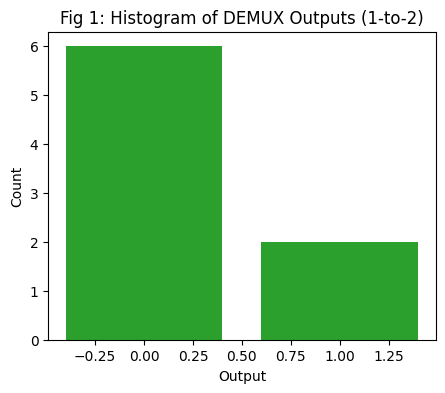

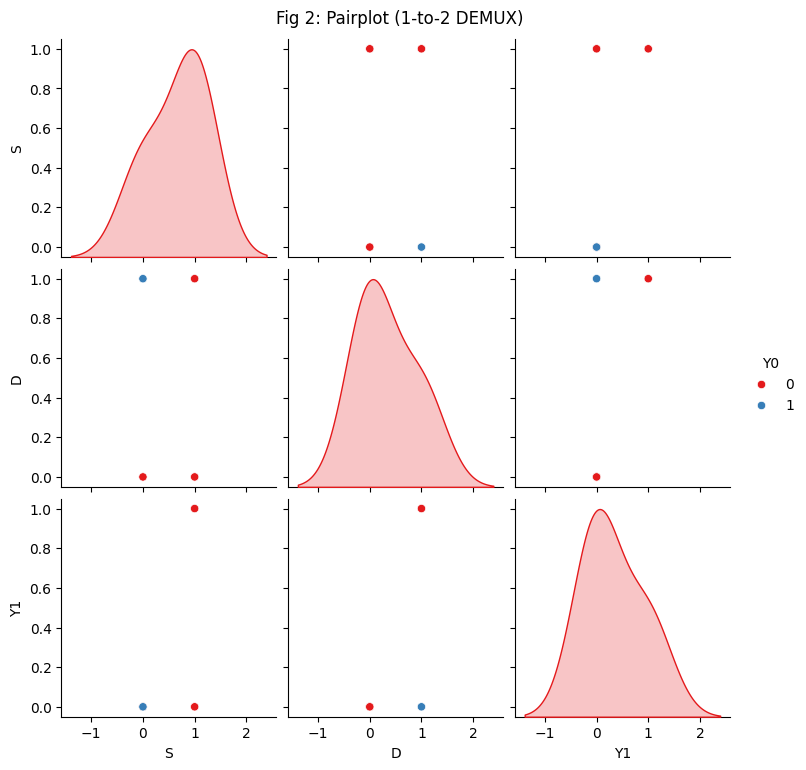

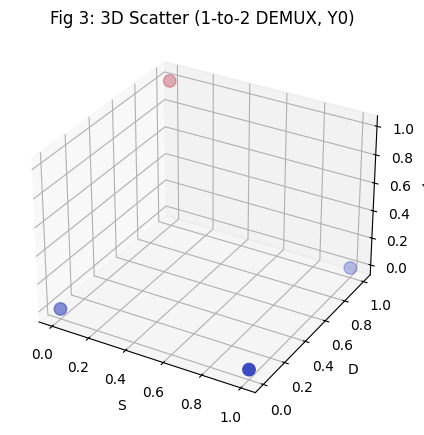

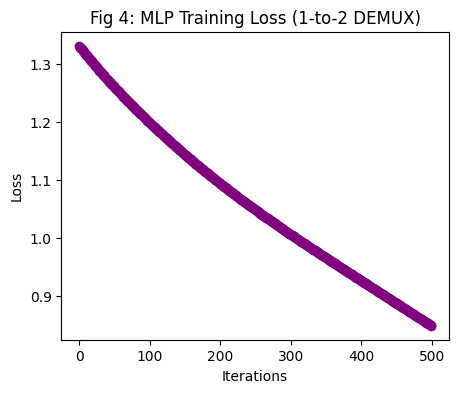


===== 1-to-4 DEMUX =====

Truth Table (1-to-4 DEMUX) Sample:
   S0  S1  D  Y0  Y1  Y2  Y3
0   0   0  0   0   0   0   0
1   0   0  1   1   0   0   0
2   0   1  0   0   0   0   0
3   0   1  1   0   0   1   0
4   1   0  0   0   0   0   0
5   1   0  1   0   1   0   0
6   1   1  0   0   0   0   0
7   1   1  1   0   0   0   1


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


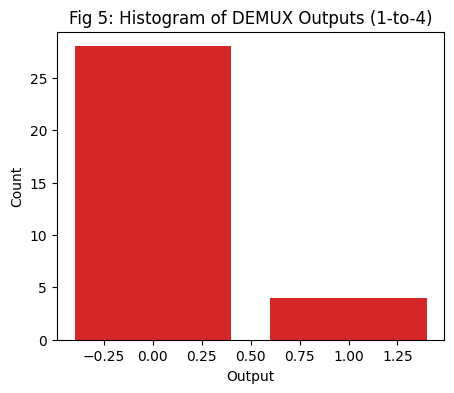

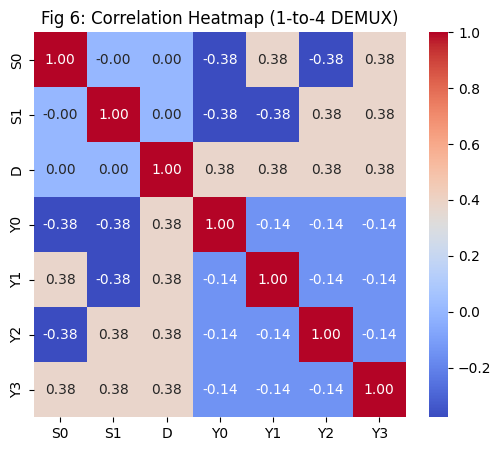

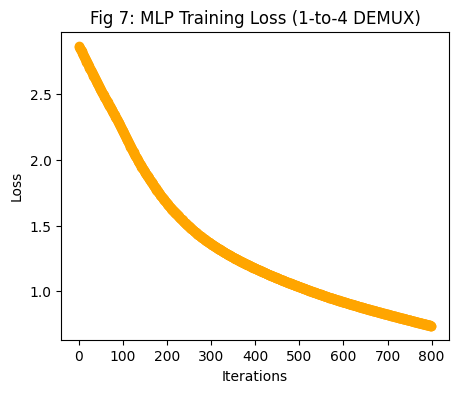

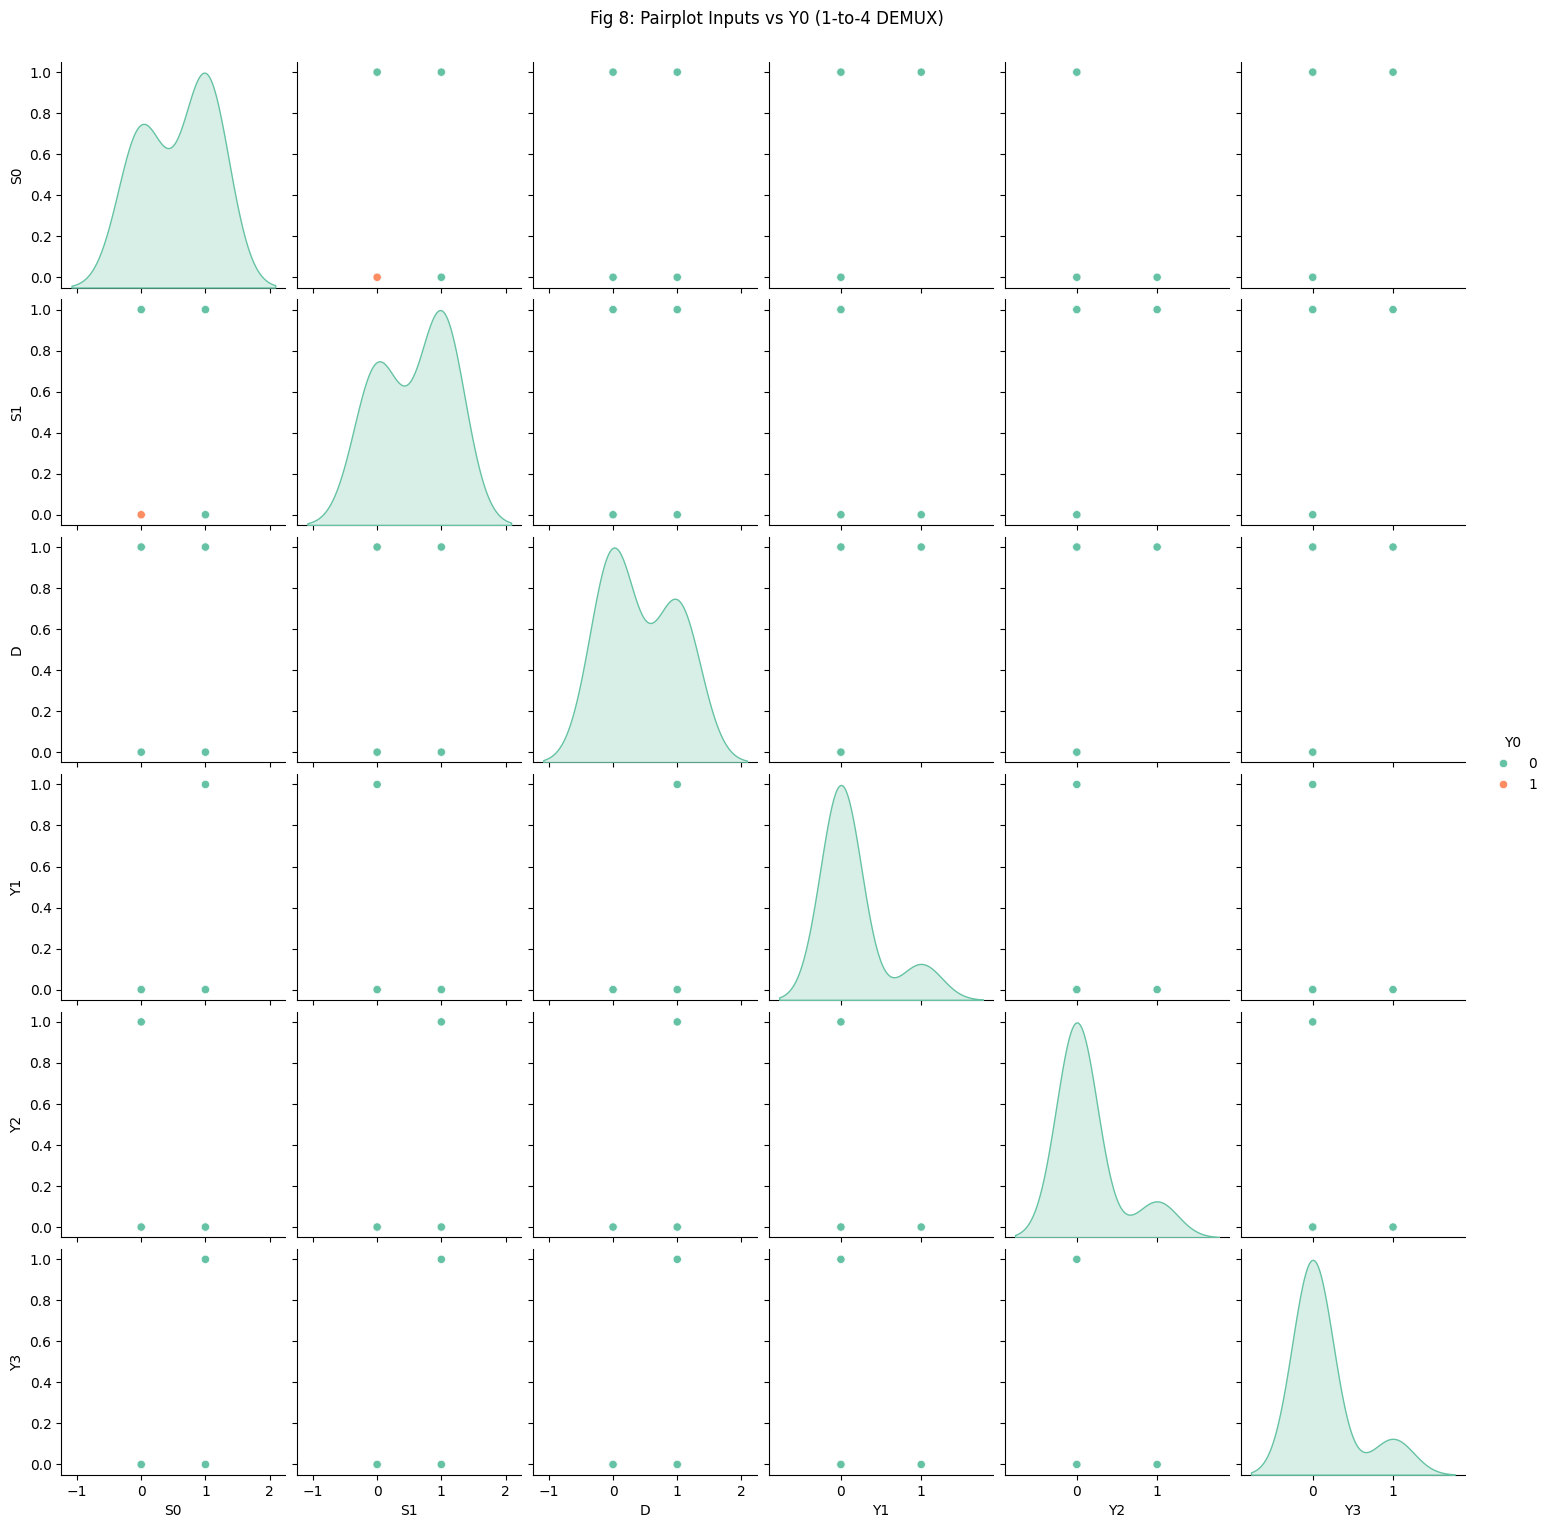

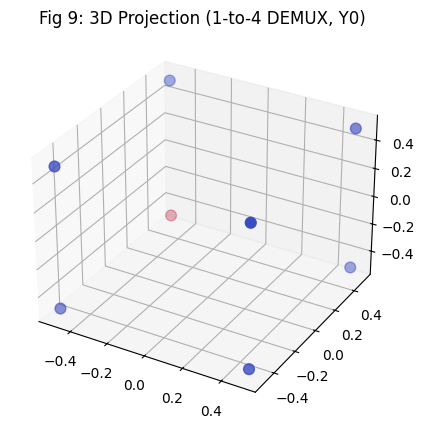

In [1]:
# ================================
# Demultiplexer (DEMUX) Implementation
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# -------------------------------------------------------
# 1. 1-to-2 DEMUX
# -------------------------------------------------------
print("\n===== 1-to-2 DEMUX =====\n")

data_demux2 = []
for S in [0,1]:
    for D in [0,1]:
        Y0 = D if S == 0 else 0
        Y1 = D if S == 1 else 0
        data_demux2.append([S, D, Y0, Y1])

df_demux2 = pd.DataFrame(data_demux2, columns=["S","D","Y0","Y1"])
print("Truth Table (1-to-2 DEMUX):")
print(df_demux2)

# Features and labels
X_demux2 = df_demux2[["S","D"]].values
y_demux2 = df_demux2[["Y0","Y1"]].values

# Train MLP for multi-output
model_demux2 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=42)
model_demux2.fit(X_demux2, y_demux2)

# -------- Visual 1: Histogram of Outputs --------
plt.figure(figsize=(5,4))
plt.hist(y_demux2.flatten(), bins=[-0.5,0.5,1.5], color="#2ca02c", rwidth=0.8)
plt.title("Fig 1: Histogram of DEMUX Outputs (1-to-2)")
plt.xlabel("Output")
plt.ylabel("Count")
plt.show()

# -------- Visual 2: Pairplot --------
sns.pairplot(df_demux2, hue="Y0", palette="Set1")
plt.suptitle("Fig 2: Pairplot (1-to-2 DEMUX)", y=1.02)
plt.show()

# -------- Visual 3: 3D Scatter (S, D, Y0) --------
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_demux2["S"], df_demux2["D"], df_demux2["Y0"], c=df_demux2["Y0"], cmap="coolwarm", s=80)
ax.set_xlabel("S")
ax.set_ylabel("D")
ax.set_zlabel("Y0")
ax.set_title("Fig 3: 3D Scatter (1-to-2 DEMUX, Y0)")
plt.show()

# -------- Visual 4: Loss Curve --------
plt.figure(figsize=(5,4))
plt.plot(model_demux2.loss_curve_, marker="o", color="purple")
plt.title("Fig 4: MLP Training Loss (1-to-2 DEMUX)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


# -------------------------------------------------------
# 2. 1-to-4 DEMUX
# -------------------------------------------------------
print("\n===== 1-to-4 DEMUX =====\n")

data_demux4 = []
for S0 in [0,1]:
    for S1 in [0,1]:
        for D in [0,1]:
            Y0 = D if (S1==0 and S0==0) else 0
            Y1 = D if (S1==0 and S0==1) else 0
            Y2 = D if (S1==1 and S0==0) else 0
            Y3 = D if (S1==1 and S0==1) else 0
            data_demux4.append([S0, S1, D, Y0, Y1, Y2, Y3])

df_demux4 = pd.DataFrame(data_demux4, columns=["S0","S1","D","Y0","Y1","Y2","Y3"])
print("Truth Table (1-to-4 DEMUX) Sample:")
print(df_demux4.head(10))

# Features and labels
X_demux4 = df_demux4[["S0","S1","D"]].values
y_demux4 = df_demux4[["Y0","Y1","Y2","Y3"]].values

# Train MLP for multi-output
model_demux4 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=800, random_state=42)
model_demux4.fit(X_demux4, y_demux4)

# -------- Visual 1: Histogram of Outputs --------
plt.figure(figsize=(5,4))
plt.hist(y_demux4.flatten(), bins=[-0.5,0.5,1.5], color="#d62728", rwidth=0.8)
plt.title("Fig 5: Histogram of DEMUX Outputs (1-to-4)")
plt.xlabel("Output")
plt.ylabel("Count")
plt.show()

# -------- Visual 2: Correlation Heatmap --------
plt.figure(figsize=(6,5))
sns.heatmap(df_demux4.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Fig 6: Correlation Heatmap (1-to-4 DEMUX)")
plt.show()

# -------- Visual 3: Training Loss --------
plt.figure(figsize=(5,4))
plt.plot(model_demux4.loss_curve_, marker="o", color="orange")
plt.title("Fig 7: MLP Training Loss (1-to-4 DEMUX)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# -------- Visual 4: Pairplot --------
sns.pairplot(df_demux4[["S0","S1","D","Y0","Y1","Y2","Y3"]], hue="Y0", palette="Set2")
plt.suptitle("Fig 8: Pairplot Inputs vs Y0 (1-to-4 DEMUX)", y=1.02)
plt.show()

# -------- Visual 5: 3D Projection using PCA --------
pca = PCA(n_components=3)
X_proj = pca.fit_transform(X_demux4)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2], c=y_demux4[:,0], cmap="coolwarm", s=60)
ax.set_title("Fig 9: 3D Projection (1-to-4 DEMUX, Y0)")
plt.show()
